<a href="https://colab.research.google.com/github/leburik-1/machine_learning/blob/main/Linear%20Regression%20with%20Sea%20Level%20Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
plt.style.use('ggplot')
sns.set_palette('husl')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'DejaVu Sans'

In [13]:
#!ls '/content/drive/My Drive/ml_data'

 1611400_meantrend.csv	 ave_hi_nyc.csv			     gax1.jpg
 1612340_meantrend.csv	 ave_yearly_temp_nyc_1895-2017.csv   horse2zebra_0.4.0_1.pth
 8418150_meantrend.csv	 cross-4062996_1280.jpg		     names.txt
 8516945_meantrend.csv	 cross.jpg			     text.c
 8574680_meantrend.csv	 cv.jpg				    'Untitled spreadsheet.gsheet'
 algorithm.jpg		 extragalactic.png


In [3]:
# Load the data and preprocess

file_path = {
    'New York': '/content/drive/My Drive/ml_data/1611400_meantrend.csv',
    'Boston': '/content/drive/My Drive/ml_data/1612340_meantrend.csv',
    'Chicago': '/content/drive/My Drive/ml_data/8418150_meantrend.csv',
    'Texas': '/content/drive/My Drive/ml_data/8516945_meantrend.csv',
    'California': '/content/drive/My Drive/ml_data/8574680_meantrend.csv'
}

In [4]:
def load_and_clean_data(file_paths):

  datasets = {}

  for city, file_path in file_paths.items():
    try:
      df = pd.read_csv(file_path,
                       skiprows=4,
                       dtype= {
                           'Year': 'int16',
                           'Month': 'int8',
                           'Monthly_MSL': 'float32',
                           'Linear_Trend': 'float32',
                           'High_Conf': 'float32',
                           'Low_Conf': 'float32'
                       },
                       na_values=['-9999','NaN', 'NA'],
                       parse_dates={'Date': ['Year', 'Month']},
                       infer_datetime_format=True)

      assert not df.empty, f"Empty dataframe for {city}"
      assert {"Monthly_MSL", "Linear_Trend"}.issubset(df.columns), "Missing required columns"

      # Store processd data
      datasets[city] = df

    except Exception as e:
      print(f"Error processing {file_path} : {str(e)}")

  return datasets
# # Create proper datetime index
#             df['Date'] = pd.to_datetime(df['Date'], format='%Y %m')
#             df.set_index('Date', inplace=True)
  # for city, file_path in file_paths.items():
  #   df = pd.read_csv(file_path, skiprows=4)
  #   df.columns = df.columns.str.strip().str.lower()
  #   print("Missing Values before dropping: ", df["monthly_msl"].isnull().sum())
  #   df = df.dropna(subset=["monthly_msl"])
  #   df["monthly_msl"] = df["monthly_msl"] * 100  # Scale up for better visualization
  #   print("Missing Values after dropping:", df["monthly_msl"].isnull().sum())
  #   df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year
  #   df = df.dropna()
  #   datasets[city] = df


In [5]:

def normalize_data(processed_data, method='standard'):
  normalized_data = {}

  for city, df in processed_data.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if method == 'standard':
      scaler = StandardScaler()

    elif method == 'minmax':
      scaler = MinMaxScaler(feature_range=(-1, 1))

    scaled_values = scaler.fit_transform(df[numeric_cols])
    scaled_df = pd.DataFrame(scaled_values,
                             index=df.index,
                             columns=[f"{col}_scaled" for col in numeric_cols])

    # Combine with original data
    normalized_df = pd.concat([df, scaled_df], axis=1)
    normalized_data[city] = normalized_df
  return normalized_data

# def plot_raw_data(datasets):
#   plt.figure(figsize=(12, 6))
#   for city, df in datasets.items():
#     plt.scatter(df['year'], df['monthly_msl'], label=city, alpha=0.7)
#     plt.xlabel("Year")
#     plt.ylabel("Monthly Mean Sea Level (mm)")
#     plt.title("Sea Level Trends - Raw Data")
#     plt.legend()
#     # plt.ylim(df["monthly_msl"].min() - 5, df["monthly_msl"].max() + 5)
#     plt.show()

In [ ]:
def plot_sea_level_trends(normalized_data, start_year=1912, end_year=2023):
  plt.figure(figsize=(12,8))

  for city, df in normalized_data.items():

    mask = (df.index.year >= start_year) & (df.index.year <= end_year)
    df = df[mask]

    plt.plot(df.index,
             df['monthly_msl_scaled'],
             alpha=0.3,
             linewidth=0.5,
             label=f'{city} Monthly')

    rolling_mean = df['Monthly_MSL_caled'].rolling(window=12, center=True).mean()
    plt.plot(df.index,
             rolling_mean,
             linewidth=2,
             label=f'{city} 12-mo Mean')

    if 'High_Conf._scaled' in df.columns:
      plt.fill_between(df.index,
                       df['Low_Conf._scaled'],
                       df['High_Conf._scaled'],
                       alpha=0.2)
      plt.title(f'Normalized Sea Level Trends ({start_year}-{end_year})', pad=20)
      plt.ylabel('Normalized Sea Level (scaled)')
      plt.xlabel('Year')
      plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
      plt.annotate('Data Source: NOAA Tide Gauges\nProcessed with scientific normalization',
                   xy=(0.05, 0.05), xycoords='axes fraction',fontsize=8, alpha=0.2)
      plt.tight_layout()
      plt.show()

Missing Values before dropping:  0
Missing Values after dropping: 0
Missing Values before dropping:  0
Missing Values after dropping: 0
Missing Values before dropping:  0
Missing Values after dropping: 0
Missing Values before dropping:  0
Missing Values after dropping: 0
Missing Values before dropping:  0
Missing Values after dropping: 0


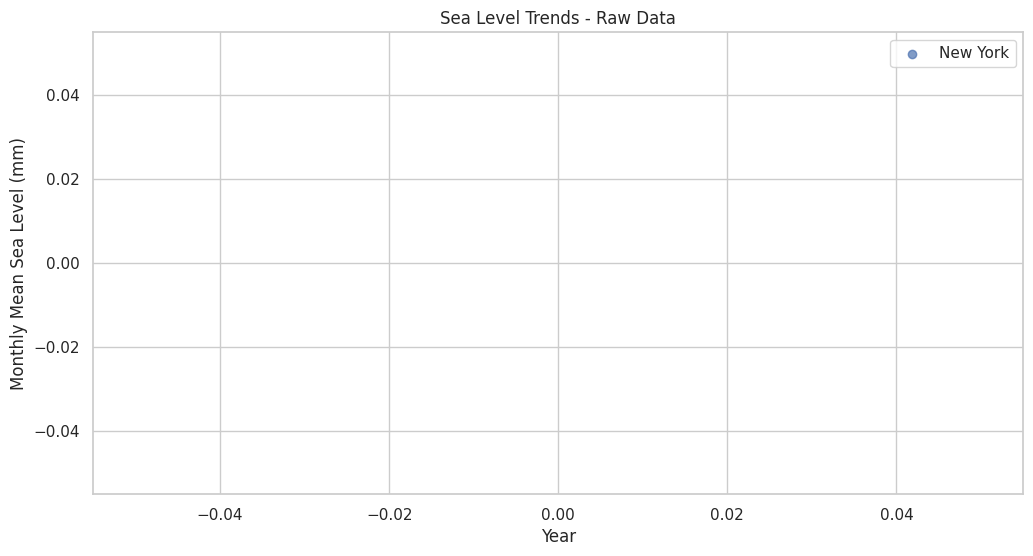

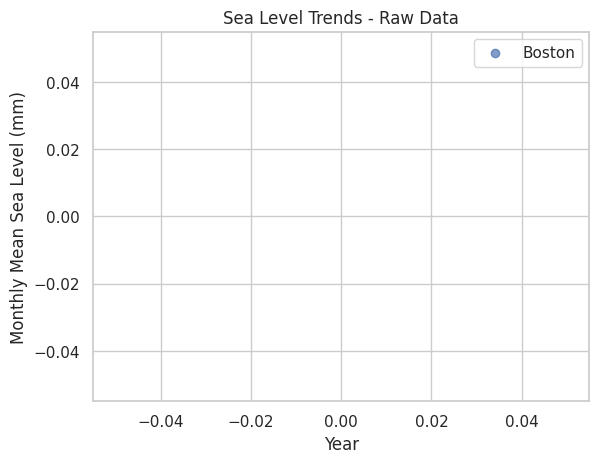

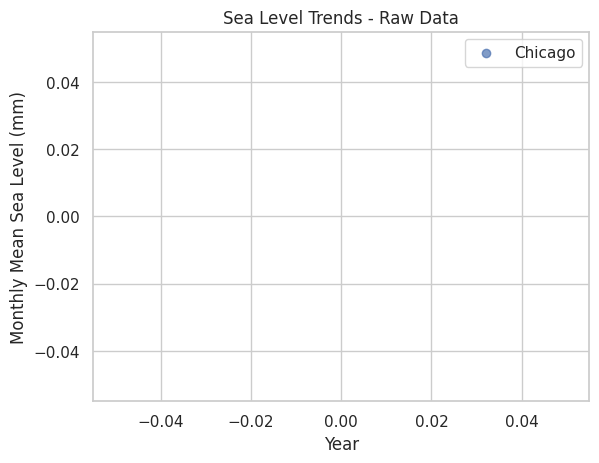

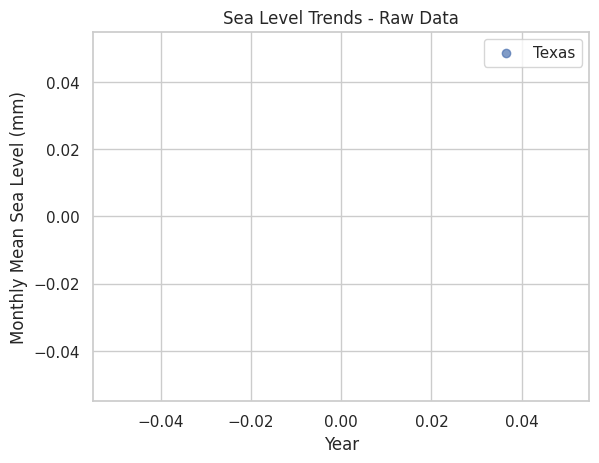

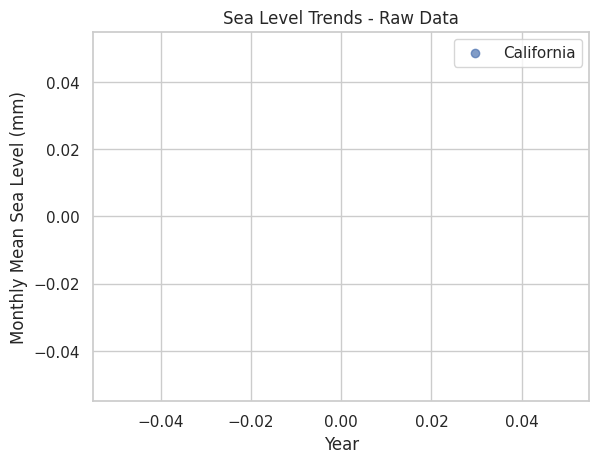

In [73]:
datasets = load_and_clean_data(file_path)
plot_raw_data(datasets)